In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_steam = pd.read_csv('/content/drive/MyDrive/games-release-ALL.csv')
df_steam

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%
...,...,...,...,...,...,...,...,...,...
66422,66422,Space Empires V,/app/1690/,Oct 16 2006,137,290,120,120,67.34%
66423,66423,Iron Warriors: T-72 Tank Command,/app/1670/,Jul 26 2006,15,173,104,104,60.17%
66424,66424,Gumboy: Crazy Adventures,/app/2520/,Dec 19 2006,22,61,60,60,50.32%
66425,66425,Shattered Union,/app/3960/,Oct 25 2006,13,71,70,70,50.27%


In [4]:
#This function provides the statistical description of the dataset - basic statistical expressions like mean, standard deviation, percentile, etc.
df_steam.describe()

,Unnamed: 0
count,66427.000000
mean,33213.000000
std,19175.967503
min,0.000000
25%,16606.500000
50%,33213.000000
75%,49819.500000
max,66426.000000


In [5]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [6]:
#convert object type to int
df_steam.head()
df_steam = df_steam.replace(',','',regex = True)
features = ['peak_players','positive_reviews','negative_reviews']
df_steam[features] = df_steam[features].astype(int)

In [7]:
#using the drop method to drop link and total reviews from the table, as total reviews column has some errors and link is unnecessary for analysis
df_steam = df_steam.drop(['link','total_reviews'],axis = 1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#displaying the top 10 games using the parameter of positive reviews
df_top10 = df_steam.sort_values('positive_reviews', ascending = False).reset_index().head(10)
df_top10

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,65121,65121,Counter-Strike: Global Offensive,Aug 21 2012,1519457,6307931,809845,88.29%
1,64838,64838,Dota 2,Jul 9 2013,1295114,1618770,341275,82.17%
2,60737,60737,Grand Theft Auto V,Apr 13 2015,364548,1319655,219551,85.25%
3,54389,54389,PUBG: BATTLEGROUNDS,Dec 21 2017,3257248,1235880,927317,57.04%
4,65339,65339,Terraria,May 16 2011,489886,1088680,24768,97.05%
5,60714,60714,Tom Clancy's Rainbow Six Siege,Dec 1 2015,201053,975285,153441,85.86%
6,66365,66365,Garry's Mod,Nov 29 2006,73863,913987,31457,95.93%
7,66268,66268,Team Fortress 2,Oct 10 2007,167951,886744,58942,93.07%
8,42745,42745,Rust,Feb 8 2018,245243,789255,118638,86.34%
9,60505,60505,The Witcher 3: Wild Hunt,May 18 2015,103329,685661,28911,95.16%


In [10]:
#displaying the top 10 games using the parameter of ratings
df_top10_rat = df_steam.sort_values('rating', ascending = False).reset_index().head(10)
df_top10_rat

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,35050,35050,People Playground,Jul 23 2019,15026,175076,2086,97.54%
1,3295,3295,Vampire Survivors,Oct 20 2022,77061,188186,2341,97.52%
2,25952,25952,Hades,Sep 17 2020,37749,219790,3274,97.34%
3,56243,56243,Stardew Valley,Feb 26 2016,94879,547823,9918,97.32%
4,66262,66262,Portal,Oct 10 2007,20672,126704,1934,97.09%
5,65339,65339,Terraria,May 16 2011,489886,1088680,24768,97.05%
6,42446,42446,RimWorld,Oct 17 2018,60789,155354,2997,96.80%
7,25953,25953,Half-Life: Alyx,Mar 23 2020,42858,78299,1262,96.79%
8,25954,25954,The Henry Stickmin Collection,Aug 7 2020,2812,36097,488,96.61%
9,25955,25955,ULTRAKILL,Sep 3 2020,16354,56614,939,96.58%


In [11]:
#displaying the top 10 games on the parameter of peak players - the number of unique players that have played the game
df_top10_peak = df_steam.sort_values('peak_players', ascending = False).reset_index().head(10)
df_top10_peak

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,54389,54389,PUBG: BATTLEGROUNDS,Dec 21 2017,3257248,1235880,927317,57.04%
1,65121,65121,Counter-Strike: Global Offensive,Aug 21 2012,1519457,6307931,809845,88.29%
2,7840,7840,Lost Ark,Feb 11 2022,1325305,137424,53849,71.29%
3,64838,64838,Dota 2,Jul 9 2013,1295114,1618770,341275,82.17%
4,27772,27772,Cyberpunk 2077,Dec 10 2020,1054388,472567,132706,77.56%
5,3427,3427,ELDEN RING,Feb 24 2022,953426,609072,54122,91.10%
6,19757,19757,New World,Sep 28 2021,913634,177063,76251,69.43%
7,23,23,Hogwarts Legacy,Feb 10 2023,879308,179479,14684,91.35%
8,15732,15732,Goose Goose Duck,Oct 3 2021,702845,39264,5549,86.12%
9,26933,26933,Apex Legends,Nov 5 2020,624473,522218,109307,82.10%


In [12]:
#displaying the worst 10 games using the parameter of positive reviews
df_worst10_pos = df_steam.sort_values('positive_reviews', ascending = True).reset_index().head(10)
df_worst10_pos

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,14642,14642,Kingdom Quest,Dec 20 2022,4,0,1,40.58%
1,3173,3173,Question Mark,Feb 18 2023,1,0,1,40.58%
2,3174,3174,DESTROY Simulator VR,Feb 14 2023,2,0,1,40.58%
3,3175,3175,The Little Witch Shop: New in Town,Mar 11 2023,2,0,1,40.58%
4,3176,3176,Eternal Hunt,Mar 19 2023,1,0,1,40.58%
5,3177,3177,Containment Search,Mar 31 2023,2,0,1,40.58%
6,3178,3178,Qualification as Rogue,Apr 6 2023,2,0,1,40.58%
7,3179,3179,Mafia in Town,Mar 1 2023,1,0,1,40.58%
8,3180,3180,Money Maker,Apr 5 2023,3,0,1,40.58%
9,3181,3181,Sexy Dream Girl: Puzzle,Mar 9 2023,1,0,1,40.58%


In [13]:
#displaying the worst 10 games using the parameter of negative reviews
df_worst10_neg = df_steam.sort_values('negative_reviews', ascending = False).reset_index().head(10)
df_worst10_neg

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,54389,54389,PUBG: BATTLEGROUNDS,Dec 21 2017,3257248,1235880,927317,57.04%
1,65121,65121,Counter-Strike: Global Offensive,Aug 21 2012,1519457,6307931,809845,88.29%
2,64838,64838,Dota 2,Jul 9 2013,1295114,1618770,341275,82.17%
3,60737,60737,Grand Theft Auto V,Apr 13 2015,364548,1319655,219551,85.25%
4,60714,60714,Tom Clancy's Rainbow Six Siege,Dec 1 2015,201053,975285,153441,85.86%
5,11318,11318,Call of Duty®: Modern Warfare® II | Warzone™ 2.0,Oct 28 2022,491670,216172,133831,61.51%
6,27772,27772,Cyberpunk 2077,Dec 10 2020,1054388,472567,132706,77.56%
7,56935,56935,Dead by Daylight,Jun 14 2016,105093,529610,128677,79.91%
8,25737,25737,Battlefield™ 2042,Nov 19 2021,105397,65753,121198,35.56%
9,42745,42745,Rust,Feb 8 2018,245243,789255,118638,86.34%


In [14]:
#displaying the worst 10 games using the parameter of ratings
df_worst10_rat = df_steam.sort_values('rating', ascending = True).reset_index().head(10)
df_worst10_rat

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,15198,15198,SuperPower 3,Oct 7 2022,1343,112,980,15.09%
1,64719,64719,Race To Mars,Mar 7 2014,87,20,242,15.55%
2,56242,56242,Urban War Defense,Jul 8 2017,137,3,78,15.99%
3,25951,25951,三国杀,Dec 17 2021,1085,3401,19768,16.39%
4,65338,65338,Fray,Jun 19 2012,17,1,49,16.70%
5,64718,64718,Construction Machines 2014,Mar 28 2014,28,34,276,17.90%
6,63131,63131,Age of Survival,Aug 25 2015,67,25,209,18.28%
7,35049,35049,MiniFarm 2020,Nov 11 2020,4,0,26,18.54%
8,60501,60501,Drunk Wizards,Jun 6 2016,16,5,64,19.15%
9,65582,65582,Flatout 3,Dec 13 2011,47,555,2779,19.55%


In [15]:
#displaying the worst 10 games on the parameter of peak players - the number of unique players that have played the game
df_worst10_peak = df_steam.sort_values('peak_players', ascending = True).reset_index().head(10)
df_worst10_peak

,index,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating
0,2620,2620,Super Passport Bros,Mar 27 2023,0,1,0,59.42%
1,66058,66058,ValveTestApp901147,Nov 4 2009,0,64,68,48.83%
2,25421,25421,Together My Headers,Dec 4 2021,0,0,1,40.58%
3,32345,32345,Crypt Of Shadows,Mar 30 2020,0,1,0,59.42%
4,1951,1951,Unknown Ways,Mar 27 2023,0,2,0,64.08%
5,65808,65808,The Elder Scrolls IV: Oblivion® Game of the Ye...,Jun 16 2009,0,38535,1761,93.76%
6,48758,48758,Teck Boxing 3D,Oct 17 2018,1,1,1,50.00%
7,48717,48717,Greenspawn Restaurant,Jul 20 2018,1,1,1,50.00%
8,48714,48714,Blueprint,May 31 2018,1,1,1,50.00%
9,48712,48712,A Quiet Mind,Jun 4 2018,1,1,1,50.00%


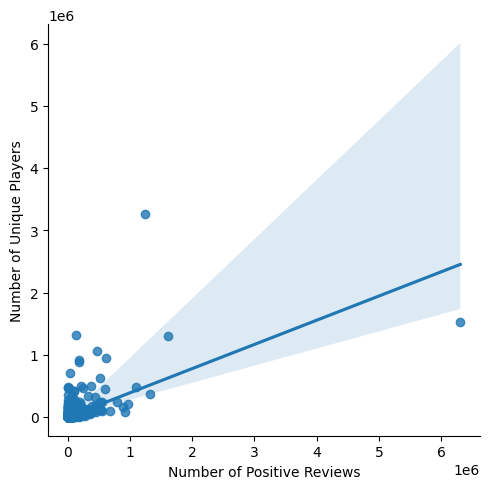

In [58]:
#Plotting the relationship between positive reviews and number of players
g1=sns.lmplot(x='positive_reviews', y = 'peak_players',data= df_steam)
g1.set(xlabel="Number of Positive Reviews", ylabel="Number of Unique Players")
g1

In [17]:
# Adding a new column with the format of the release date in [year] instead of [date, month, year] so that data can be analysed by year of release
df_steam['release_year'] = df_steam['release']
df_steam['release_year'] = pd.to_datetime(df_steam['release_year'],format = '%b %d %Y')
df_steam['release_year'] = df_steam['release_year'].dt.year

In [18]:
df_steam

,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,rating,release_year
0,0,Pizza Tower,Jan 26 2023,4529,19807,227,96.39%,2023
1,1,Resident Evil 4,Mar 24 2023,168191,61752,1616,95.75%,2023
2,2,The Murder of Sonic the Hedgehog,Mar 31 2023,15543,12643,213,95.54%,2023
3,3,Pineapple on pizza,Mar 28 2023,1415,11717,209,95.39%,2023
4,4,Hi-Fi RUSH,Jan 25 2023,6132,14152,324,95.09%,2023
...,...,...,...,...,...,...,...,...
66422,66422,Space Empires V,Oct 16 2006,137,290,120,67.34%,2006
66423,66423,Iron Warriors: T-72 Tank Command,Jul 26 2006,15,173,104,60.17%,2006
66424,66424,Gumboy: Crazy Adventures,Dec 19 2006,22,61,60,50.32%,2006
66425,66425,Shattered Union,Oct 25 2006,13,71,70,50.27%,2006


In [19]:
# Observing the number of games released each year from 2006 to 2023
release = pd.pivot_table(df_steam, index = 'release_year', values ='game', aggfunc = len).reset_index()
release

,release_year,game
0,2006,62
1,2007,103
2,2008,180
3,2009,277
4,2010,222
5,2011,244
6,2012,246
7,2013,373
8,2014,1588
9,2015,2630


In [46]:
# Sorting the table in the descending order to see the years which had more games released
release_sorted = release.sort_values('game', ascending=False)
release_sorted

,release_year,game
16,2022,11904
15,2021,10753
14,2020,9098
12,2018,7749
13,2019,7396
11,2017,6048
10,2016,4259
17,2023,3295
9,2015,2630
8,2014,1588


In [51]:
# Converting the release year from %YYYY format to %YY, so that it is easier to show in graphs, and all years are after 2000
release_sorted_ed = release_sorted
release_sorted_ed['release_year']%=100
release_sorted_ed

,release_year,game
16,22,11904
15,21,10753
14,20,9098
12,18,7749
13,19,7396
11,17,6048
10,16,4259
17,23,3295
9,15,2630
8,14,1588


<Axes: xlabel='Year (20XX)', ylabel='Number of Games Released'>

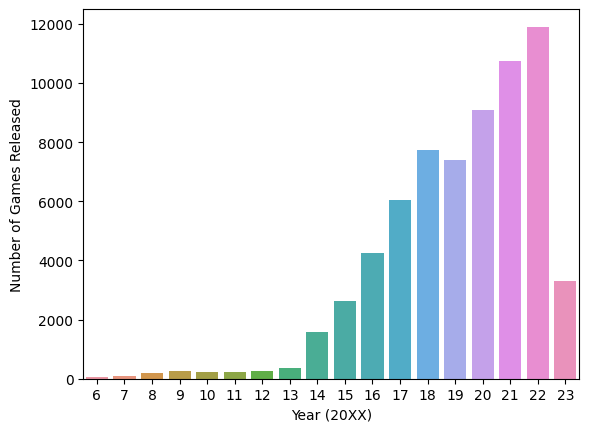

In [56]:
# Plotting the edited table of number of games released per year
g2 = sns.barplot(x='release_year', y='game', data = release_sorted_ed)
g2.set(xlabel="Year (20XX)",ylabel="Number of Games Released")
g2